In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime, timedelta
import yfinance as yf

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import yfinance as yf
end_date = datetime.now() - timedelta(days=30)
end_date_str = end_date.strftime('%Y-%m-%d')
df = yf.download('AAPL',start='2010-01-01',end=end_date_str)
dftest=yf.download('AAPL',start=end_date_str)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375155,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800
...,...,...,...,...,...,...
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.545319,44846000
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.741104,56934900


In [5]:
df = df.reset_index()
dftest = dftest.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375155,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [6]:
df.drop(['Date','Adj Close'],axis=1,inplace=True)
dftest.drop(['Date','Adj Close'],axis=1,inplace=True)

In [7]:
dftest.shape

(19, 5)

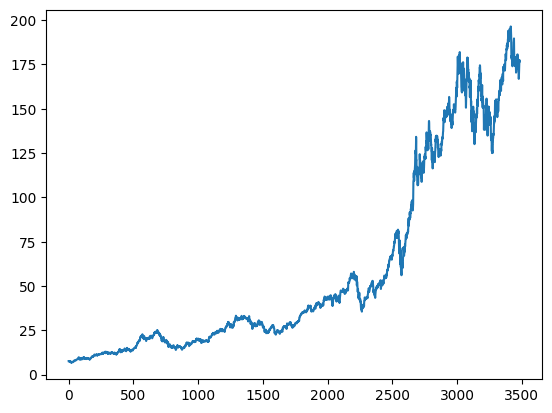

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


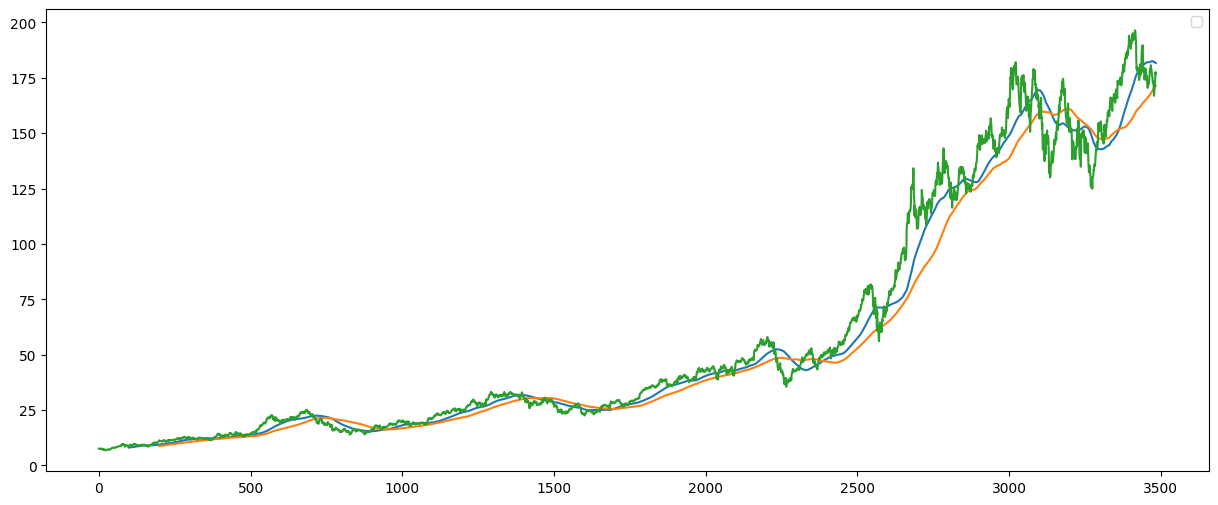

In [10]:
plt.figure(figsize=(15,6))
plt.plot(ma100)
plt.plot(ma200)
plt.plot(df.Close)
plt.legend()

In [11]:
df.shape

(3484, 5)

In [12]:
df1=pd.DataFrame(df['Close'])
df1

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
3479,170.289993
3480,170.770004
3481,173.970001
3482,177.570007


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)),df1==scaler.fit_transform(df1)
df1.shape

NameError: name 'scaler' is not defined

In [14]:
len(df1)-120-1
aa=df1.iloc[1:(1+120),0]
aa

1      7.656429
2      7.534643
3      7.520714
4      7.570714
5      7.503929
         ...   
116    9.648929
117    9.780357
118    9.677500
119    9.607143
120    9.525000
Name: Close, Length: 120, dtype: float64

In [15]:
def split(dataset):
	time_step=120
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset.iloc[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
X_train,y_train=split(df1)

In [18]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train.shape

(3363, 120)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-12-04 08:27:33.275474: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 08:27:33.307653: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 08:27:33.307690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 08:27:33.308922: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 08:27:33.314661: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 08:27:33.315437: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(120,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.fit(X_train,y_train,epochs=50,batch_size=14,verbose=2)

Epoch 1/50


241/241 - 19s - loss: 5072.5396 - 19s/epoch - 78ms/step
Epoch 2/50
241/241 - 15s - loss: 4100.9805 - 15s/epoch - 63ms/step
Epoch 3/50
241/241 - 15s - loss: 3569.9863 - 15s/epoch - 64ms/step
Epoch 4/50
241/241 - 16s - loss: 3098.4712 - 16s/epoch - 65ms/step
Epoch 5/50
241/241 - 15s - loss: 2490.7854 - 15s/epoch - 64ms/step
Epoch 6/50
241/241 - 16s - loss: 2054.6233 - 16s/epoch - 65ms/step
Epoch 7/50
241/241 - 16s - loss: 1691.9064 - 16s/epoch - 68ms/step
Epoch 8/50
241/241 - 16s - loss: 1388.6364 - 16s/epoch - 64ms/step
Epoch 9/50
241/241 - 16s - loss: 1131.2867 - 16s/epoch - 64ms/step
Epoch 10/50
241/241 - 15s - loss: 911.5860 - 15s/epoch - 64ms/step
Epoch 11/50
241/241 - 15s - loss: 728.5673 - 15s/epoch - 63ms/step
Epoch 12/50
241/241 - 15s - loss: 578.6149 - 15s/epoch - 62ms/step
Epoch 13/50
241/241 - 15s - loss: 456.4038 - 15s/epoch - 62ms/step
Epoch 14/50
241/241 - 15s - loss: 357.8805 - 15s/epoch - 62ms/step
Epoch 15/50
241/241 - 15s - loss: 281.8745 - 15s/epoch - 63ms/step
Epoch 

In [30]:
model.save('lmodel.h5')

In [31]:
train_predict=model.predict(X_train)

106/106 [==============================] - 3s 22ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)

NameError: name 'scaler' is not defined

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.0666359765380165

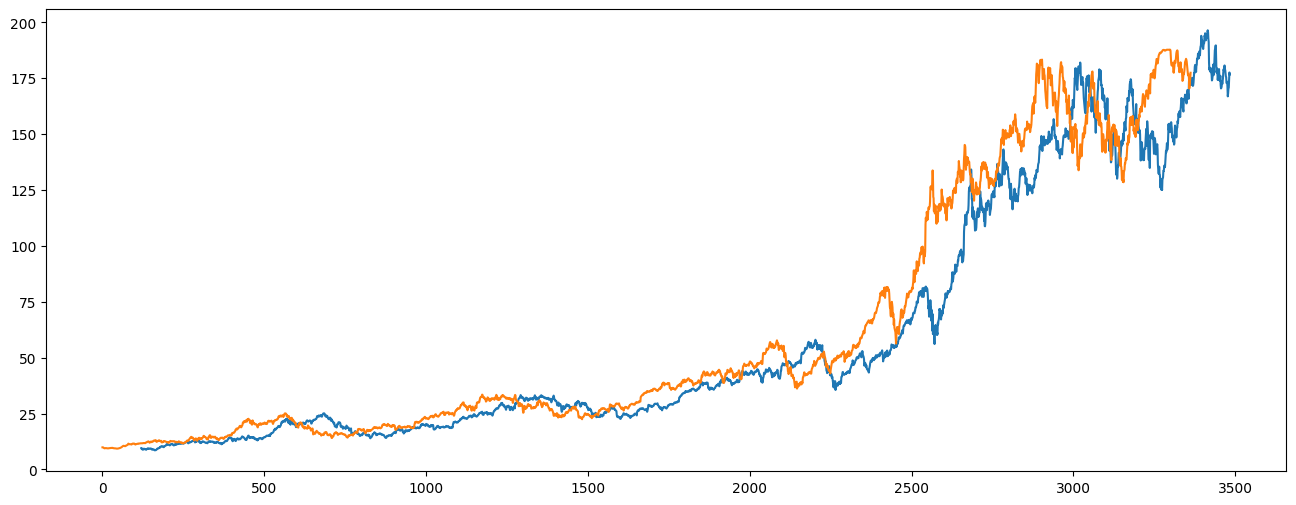

In [37]:
look_back=120
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
plt.figure(figsize=(16,6))
plt.plot(df1[120:])
plt.plot(trainPredictPlot[120:])
plt.show()

In [40]:
x_input=np.array(df1[-120:]).reshape(1,-1)

In [41]:
x_input.shape

(1, 120)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
input_sequence = np.array([temp_input])
input_sequence = np.reshape(input_sequence, (1, len(temp_input), 1))
predicts = []
for _ in range(60):
    next_pred = model.predict(input_sequence)
    predicts.append(next_pred[0,0])  # Assuming single-feature output, adjust accordingly
    input_sequence = np.append(input_sequence[:, 1:, :], [[next_pred]], axis=1)
print(predicts)

1/1 [==============================] - 0s 33ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [88]:
new_pred= np.array(predicted_values)
new_pred= new_pred.reshape(-1,1)
new_pred.shape

(30, 1)

In [89]:
unscaled_pred=pd.DataFrame(scaler.inverse_transform(new_pred))
real_values= pd.DataFrame(scaler.inverse_transform(df1))

In [93]:
plus60days_pred = pd.concat([real_values,unscaled_pred])
plus60days_pred.reset_index(drop=True,inplace=True)
plot60 = np.empty_like(plus60days_pred)
plot60[:, :] = np.nan
plot60[len(real_values):, :] = plus60days_pred

,0
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
3509,277.337219
3510,277.984375
3511,278.571716
3512,279.104797


In [ ]:
plus30days_real = pd.concat([real_values,dftest[['Close']]])
plus30days_real.reset_index(drop=True,inplace=True)
plot30 = np.empty_like(plus30days_real)
plot30[:, :] = np.nan
plot30[len(real_values):, :] = plus30days_real

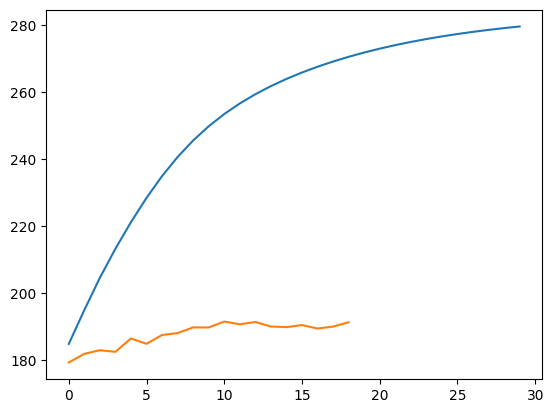

In [98]:
plt.plot(plot30)
plt.plot(plot60)

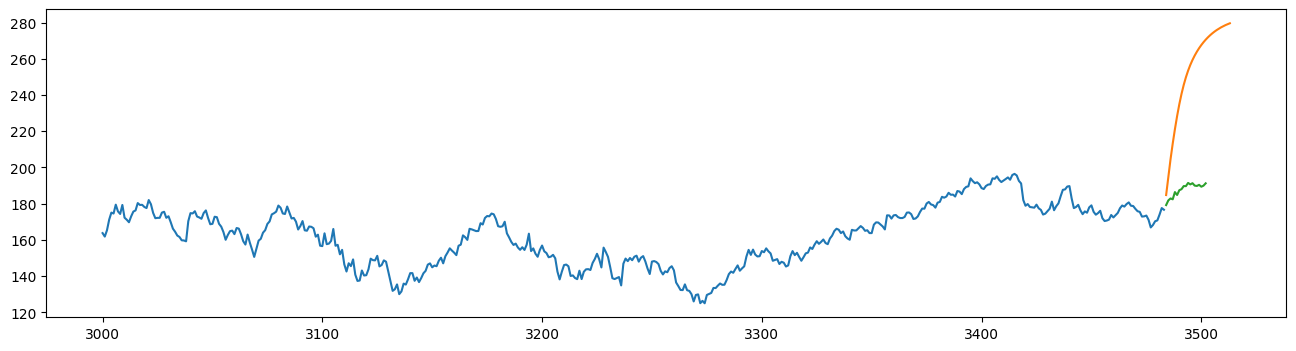

In [99]:
plt.figure(figsize=(16,4))
plt.plot(df3[3000:])
plt.plot(plotn)
plt.plot(plott)